In [7]:
#import evverything needed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from scipy.optimize import curve_fit

## Limb Angles

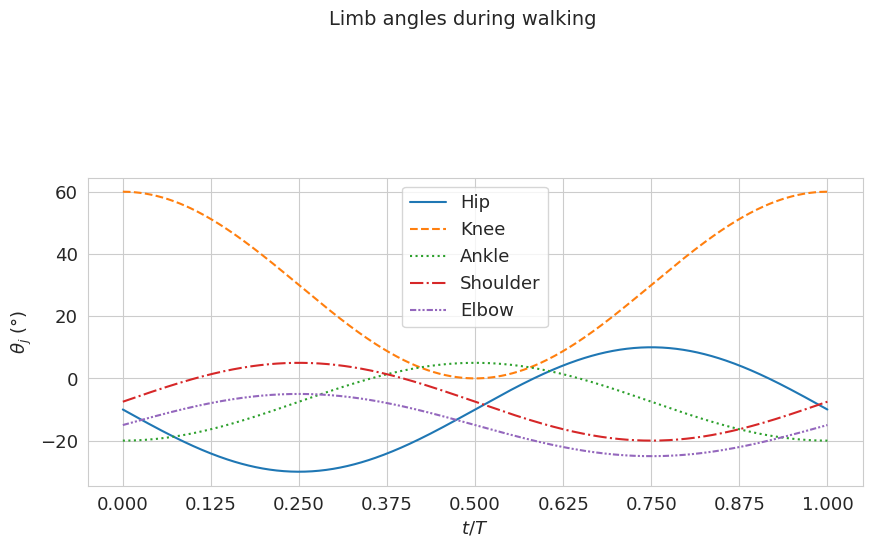

In [13]:
# Define the range of x values (one period typically from 0 to 2π)
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 4))

# Plot each function
sns.set_style('whitegrid')
plt.plot(x, -10 + -20*np.sin(np.pi*2*x), label='Hip')
plt.plot(x, 30 + 30*np.cos(np.pi*2*x), label='Knee', linestyle='dashed')
plt.plot(x, -7.5 + -12.5*np.cos(np.pi*2*x), label='Ankle', linestyle='dotted')
plt.plot(x, -7.5 + 12.5*np.sin(np.pi*2*x), label='Shoulder', linestyle='dashdot')
plt.plot(x, -15 + 10*np.sin(np.pi*2*x), label='Elbow', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Customizing the plot
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.125))
plt.xlabel(r'$t/T$')
plt.ylabel(r'$\theta_j$ (°)')
plt.legend()

# Place the title 
plt.figtext(0.5, 1.3, 'Limb angles during walking', ha='center', va='top', fontsize=14)


# Save the plot to a file
plt.savefig('walking_limb_angles.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

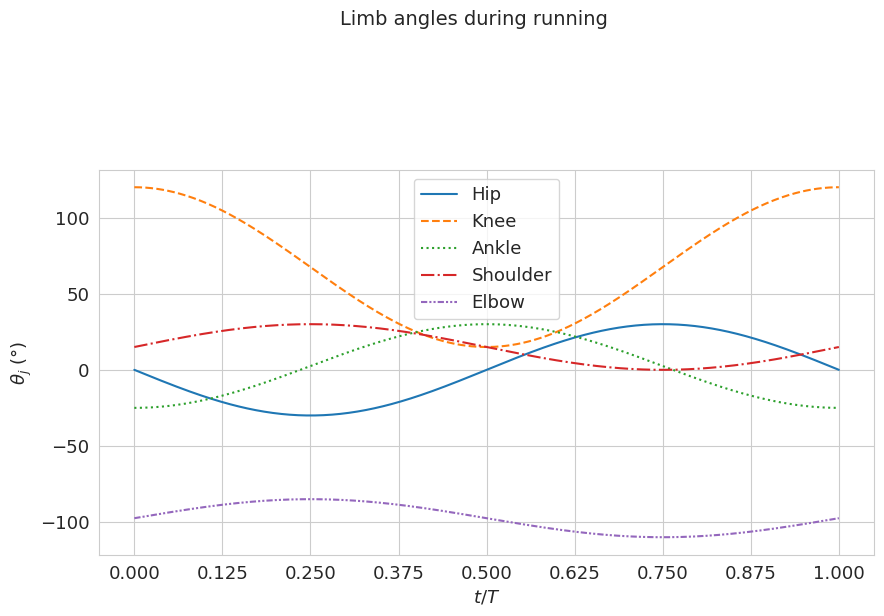

In [14]:
# Define the range of x values (one period typically from 0 to 2π)
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 5))

# Plot each function
plt.plot(x, 0 + -30*np.sin(np.pi*2*x), label='Hip')
plt.plot(x, 67.5 + 52.5*np.cos(np.pi*2*x), label='Knee', linestyle='dashed')
plt.plot(x, 2.5 + -27.5*np.cos(np.pi*2*x), label='Ankle', linestyle='dotted')
plt.plot(x, 15 + 15*np.sin(np.pi*2*x), label='Shoulder', linestyle='dashdot')
plt.plot(x, -97.5 + 12.5*np.sin(np.pi*2*x), label='Elbow', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Customizing the plot
sns.set_style('whitegrid')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.125))
plt.xlabel(r'$t/T$')
plt.ylabel(r'$\theta_j$ (°)')
plt.legend()

# Place the title below the graph
plt.figtext(0.5, 1.2, 'Limb angles during running', ha='center', va='top', fontsize=14)


# Save the plot to a file
plt.savefig('running_limb_angles.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Code Validation

### Sphere

/tmp/ipykernel_3320/1414676655.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


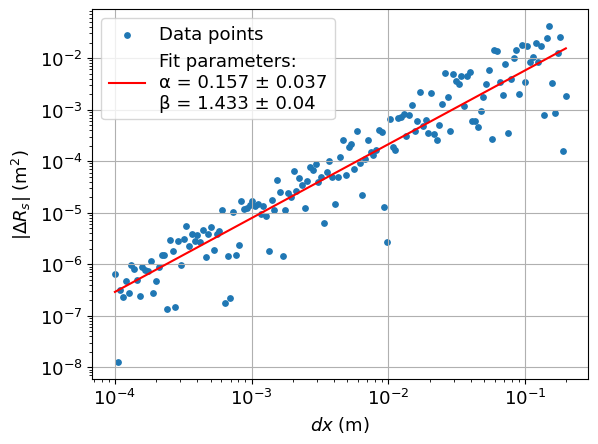

In [12]:
def anal_s(vrain, bodyvel, rad):
    vrel = vrain.copy()
    vrel[0] -= bodyvel
    surface = np.pi * rad ** 2
    return np.linalg.norm(vrel) * surface / bodyvel

def max_s(rad):
    return np.pi * rad ** 2

vrain = np.array( [0.5, 0.25, -1.])
bodyvel = 2.
rad = 0.5


# Read the data from the file
df = pd.read_csv('../data/Sphere/ErrorS.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)
df = df[df['dx']<=0.2]

# Transform the data
df['error'] = np.abs(df['num'] - anal_s( vrain, bodyvel, rad))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])

# Function to model (log-log power law)
def log_power_law(x, a, b):
    return np.log(a) +  b*x

# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 13})

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_s|$ (m$^2$)') 

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/sphere_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_3320/3997883351.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


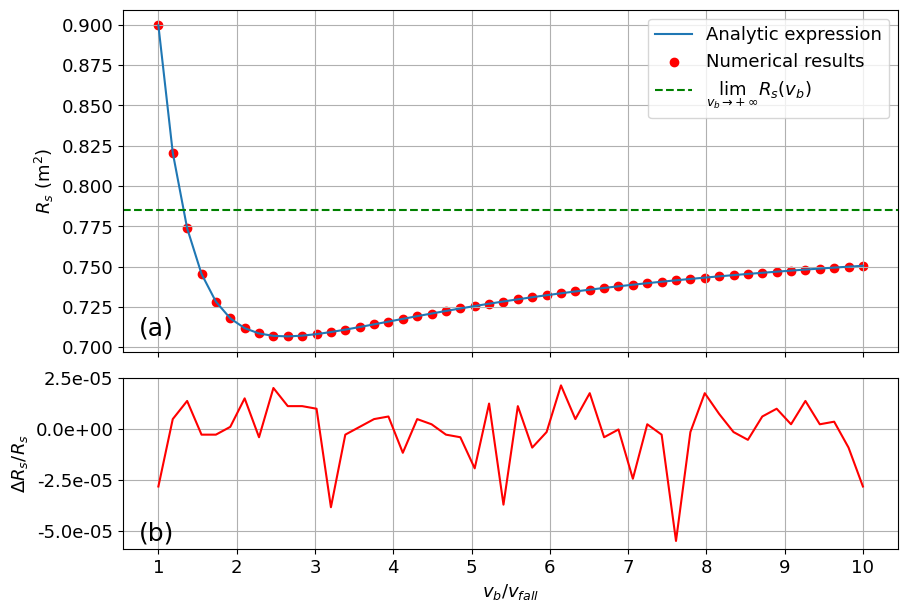

In [13]:
# Read the data from the file
with open("../data/Sphere/CompareS.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytic expression')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_s(rad), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_s$ (m$^2$)')
ax1.grid(True)
ax1.legend()
ax1.text(0.02, 0.05, "(a)", transform=ax1.transAxes, fontsize=18)


# Custom formatter function for scientific notation
def scientific_formatter(x, pos):
    return f'{x:.1e}'

# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_s/R_s$')
ax2.grid(True)
ax2.text(0.02, 0.05, "(b)", transform=ax2.transAxes, fontsize=18)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/sphere_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Parallelepiped

/tmp/ipykernel_3320/1414676655.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


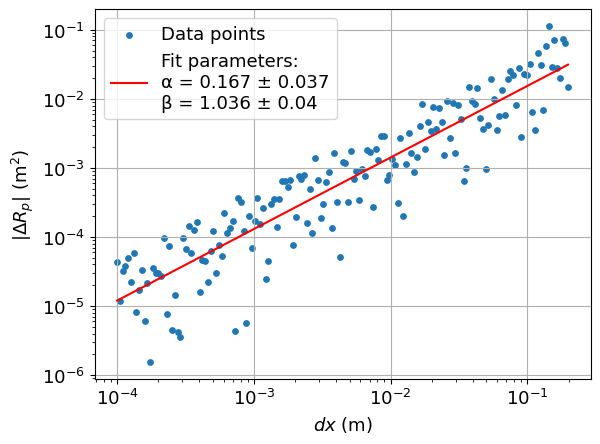

In [14]:
def anal_p(vrain, bodyvel, side):
    vrel = vrain.copy()
    vrel[0] -= bodyvel
    flux = 0
    flux += np.abs(np.dot(np.cross(side[0], side[1]), vrel))
    flux += np.abs(np.dot(np.cross(side[1], side[2]), vrel))
    flux += np.abs(np.dot(np.cross(side[2], side[0]), vrel))
    return flux/bodyvel

def max_p(side):
    flux = 0
    flux += np.abs(np.dot(np.cross(side[0], side[1]), [1,0,0]))
    flux += np.abs(np.dot(np.cross(side[1], side[2]), [1,0,0]))
    flux += np.abs(np.dot(np.cross(side[2], side[0]), [1,0,0]))
    return flux


side = [np.array([0.4, 0.0, 0.0]), np.array([0.0, 0.6, 0.0]), np.array([0.0, 0.0, 0.8])]

# Read the data from the file
df = pd.read_csv('../data/Pippo/ErrorP.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)
df = df[df['dx']<=0.2]

# Transform the data
df['error'] = np.abs(df['num'] - anal_p(vrain, bodyvel, side))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])

# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_p|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')

plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/pippo_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3320/2252489253.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


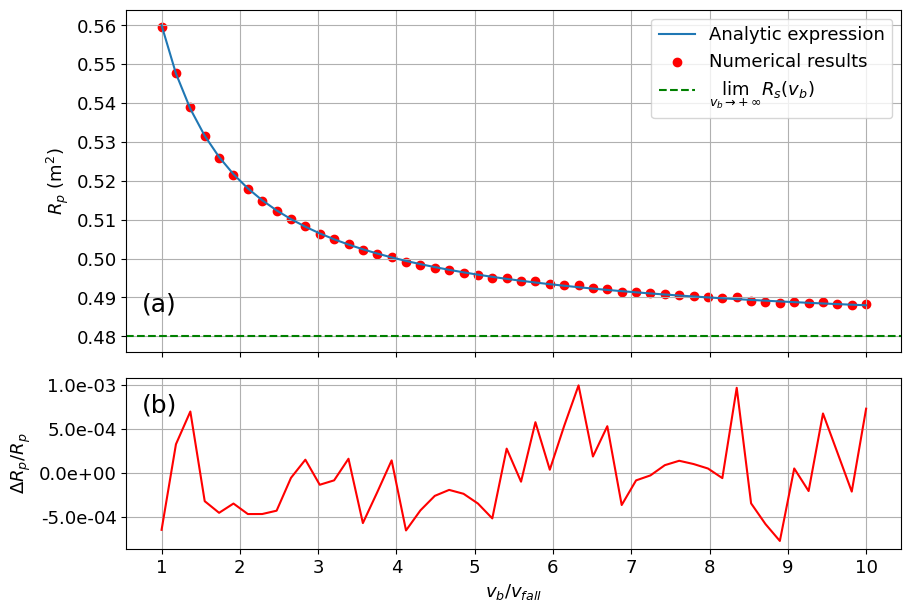

In [15]:
# Read the data from the file
with open("../data/Pippo/CompareP.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytic expression')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_p(side), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed') 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_p$ (m$^2$)')
ax1.grid(True)
ax1.legend()
ax1.text(0.02, 0.12, "(a)", transform=ax1.transAxes, fontsize=18)



# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_p/R_p$')
ax2.grid(True)
ax2.text(0.02, 0.8, "(b)", transform=ax2.transAxes, fontsize=18)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/pippo_wet.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Capsule

/tmp/ipykernel_3320/1414676655.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


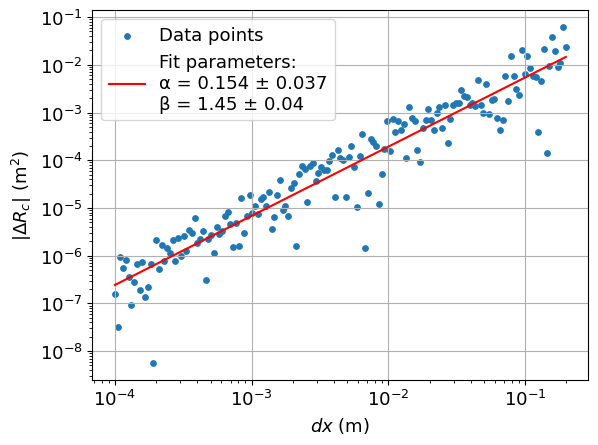

In [16]:
def anal_c(vrain, bodyvel, l1, l2, rad):
    vrel = vrain.copy()
    vrel[0] -= bodyvel
    # Vector subtraction to get the axis
    axis = np.array(l1) - np.array(l2)

    # Adjusting the axis based on v
    axis -= np.dot(vrel, axis) * np.array(vrel) / np.dot(vrel, vrel)

    # Calculating the norm of the axis
    L = np.linalg.norm(axis)

    # Computing the surface
    surface = np.pi * rad ** 2 + L * 2 * rad

    # Returning the final result
    return np.linalg.norm(vrel) * surface / bodyvel

def max_c( l1, l2, rad):
    # Vector subtraction to get the axis
    axis = np.array(l1) - np.array(l2)

    # Adjusting the axis based on v
    axis -= np.dot([1,0,0], axis) * np.array([1,0,0])

    # Calculating the norm of the axis
    L = np.linalg.norm(axis)

    # Returning the final result
    return np.pi * rad ** 2 + L * 2 * rad

r = 0.3
l1 = np.array( [0.35, 0.35, 0.35])
l2 = np.array( [0.75, 0.75, 0.75])


# Read the data from the file
df = pd.read_csv('../data/Capsule/ErrorC.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)
df = df[df['dx']<=0.2]

# Transform the data
df['error'] = np.abs(df['num'] - anal_c(vrain, bodyvel, l1, l2, r))
df['log_dx'] = np.log( df['dx'])
df['log_error'] = np.log( df['error'])


# Fit the data to the power-law model
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])

# Generate fitted values
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data
plt.scatter(df['dx'], df['error'], label='Data points', s=15)  
plt.xlabel(r'$dx$ (m)')
plt.ylabel(r'$|\Delta R_c|$ (m$^2$)')  

# Plot the fitted curve
plt.plot(df['dx'], fitted_error, color='red', label=f"Fit parameters: \nα = {round(params[0],3)} ± {round(standard_errors[0], 3)}\nβ = {round(params[1], 3)} ± {round(standard_errors[1], 3)}")

# Settings
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/capsule_err_fit.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_3320/3262682699.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


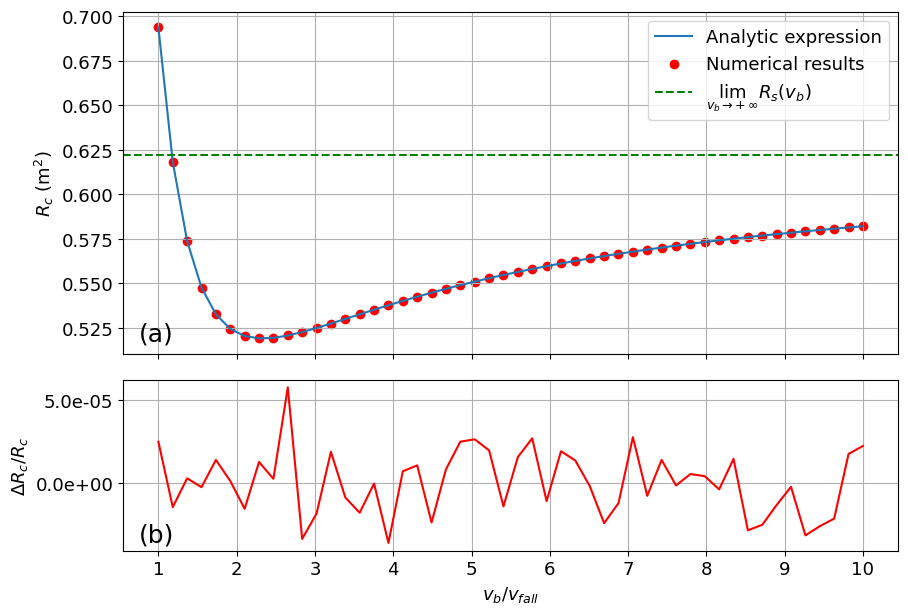

In [17]:
# Read the data from the file
with open("../data/Capsule/CompareC.dat", "r") as file:
    lines = file.readlines()

x_values = []
y1_values = []
y2_values = []

for line in lines:
    x, y1, y2 = map(float, line.split())
    x_values.append(x)
    y1_values.append(y1)
    y2_values.append(y2)

# Calculate the difference between Y1 and Y2
difference = [(y2 - y1) / y1 for y1, y2 in zip(y1_values, y2_values)]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.1)  # Reduced spacing

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the x-axis with ax1

# Plot the primary data on the first subplot
ax1.plot(x_values, y1_values, label='Analytic expression')
ax1.scatter(x_values, y2_values, color='red', label='Numerical results')
ax1.axhline(y=max_c(l1, l2, r), label=r'$\lim_{v_b\to+\infty} R_s(v_b)$', color='green', linestyle='dashed')  
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_ylabel(r'$R_c$ (m$^2$)')
ax1.grid(True)
ax1.legend()
ax1.text(0.02, 0.04, "(a)", transform=ax1.transAxes, fontsize=18)


# Apply the custom formatter to the y-axes
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(scientific_formatter))


# Plot the relative error on the second subplot
ax2.plot(x_values, difference, color='red')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.set_xlabel(r'$v_b/v_{fall}$')
ax2.set_ylabel(r'$\Delta R_c/R_c$')
ax2.grid(True)
ax2.text(0.02, 0.05, "(b)", transform=ax2.transAxes, fontsize=18)

# Hide x-labels and tick labels for top plots and y-tick labels for right plots
plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout for clarity
plt.tight_layout()

# Save the plot to a file
plt.savefig('../Tesi/capsule_wet.png')

# Show the plot
plt.show()

### Double Parallelepiped

In [18]:
# Read the data from the file
df = pd.read_csv('../data/Pippo/DoubleP.dat', sep=' ', header=None, names=['dist', 'R'], index_col=False)

# Plot min and max
v_rel = [-0.52, 0.03, -1]
body_vel = 0.52
s1 = anal_p(v=v_rel, bodyvel=body_vel, side= [ [0.8, 0, 0], [0, 0.5, 0], [0, 0, 0.8]])
s2 = anal_p(v=v_rel, bodyvel=body_vel, side= [ [0.6, 0, 0], [0, 0.3, 0], [0, 0, 0.6]])
plt.axhline(y=s1, label=r'$R_{p1}$', color='green', linestyle='dashed')  
plt.axhline(y=s1+s2, label=r'$R_{p1} +R_{p2}$', linestyle='dashdot')  
# Plot the fitted curve
plt.scatter(df['dist'], df['R'], label="Numerical results", s=10, color='red')

plt.xlabel(r'$|\mathbf{c}_1 - \mathbf{c}_2|$ (m)')
plt.ylabel(r'$R_{2p}$ (m$^2$)')



plt.legend()

# Save the plot to a file
plt.savefig('../Tesi/2pippo_wet.png', dpi=300, bbox_inches='tight')

TypeError: anal_p() got an unexpected keyword argument 'v'

## Results

### Error Analysis

In [ ]:
# Function to model (log-log power law)
def power_law(x, R, A, B):
    return R + A*(x**B)

/tmp/ipykernel_3320/1414676655.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


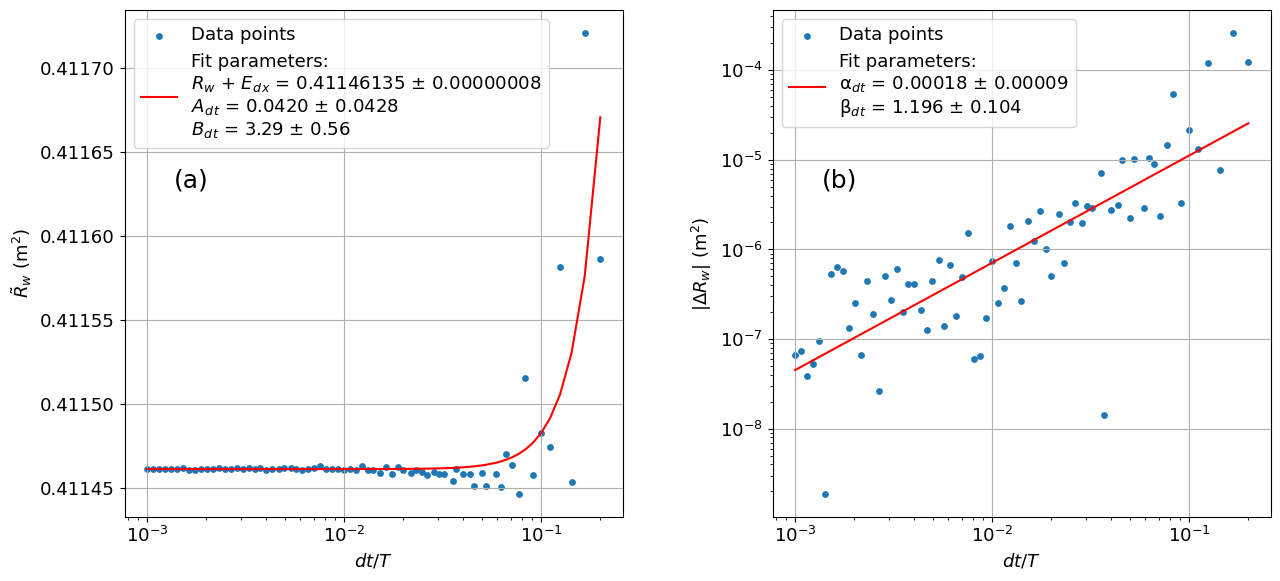

In [19]:
# Read the data from the file
df = pd.read_csv('../data/Walk/ErrT.dat', sep=' ', header=None, names=['nstep', 'num'], index_col=False)

# Transform the data
df['dt'] = 1/(df['nstep'])
df = df[df['dt']<=0.2]


# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dt'], df['num'], sigma=df['dt'])

# Generate fitted values
fitted_error = power_law(df['dt'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))  # Adjust the figsize to fit your needs

# Plotting the data on the first subplot
ax1.scatter(df['dt'], df['num'], label='Data points', s=15)
ax1.set_xlabel(r'$dt/T$')
ax1.set_ylabel(r'$\tilde{R}_w$ (m$^2$)')
# Plot the fitted curve on the first subplot
ax1.plot(df['dt'], fitted_error, color='red', label="Fit parameters: \n$R_w$ + $E_d$$_x$ = {:.8f} ± {:.8f}\n$A_d$$_t$ = {:.4f} ± {:.4f}\n$B_d$$_t$ = {:.2f} ± {:.2f}".format(params[0], standard_errors[0], params[1], standard_errors[1], params[2], standard_errors[2]))
ax1.set_xscale('log')
ax1.grid(True)
ax1.legend()
ax1.text(0.1, 0.65, "(a)", transform=ax1.transAxes, fontsize=18)

# Transform the data for the second plot
df['error'] = np.abs(df['num'] - params[0])
df['log_dt'] = np.log(df['dt'])
df['log_error'] = np.log(df['error'])


# Fit the data to the log-power-law model
params, covariance = curve_fit(log_power_law, df['log_dt'], df['log_error'])
# Calculate the standard errors again, assuming it's required for the second fit
standard_errors = np.sqrt(np.diag(covariance))
# Generate fitted values for the second plot
fitted_error = np.exp(log_power_law(df['log_dt'], *params))

# Plotting the data on the second subplot
ax2.scatter(df['dt'], df['error'], label='Data points', s=15)
ax2.set_xlabel(r'$dt/T$')
ax2.set_ylabel(r'$|\Delta R_w|$ (m$^2$)')
# Plot the fitted curve on the second subplot
ax2.plot(df['dt'], fitted_error, color='red', label="Fit parameters: \nα$_d$$_t$ = {:.5f} ± {:.5f}\nβ$_d$$_t$ = {:.3f} ± {:.3f}".format(params[0], standard_errors[0], params[1], standard_errors[1]))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True)
ax2.legend()
ax2.text(0.1, 0.65, "(b)", transform=ax2.transAxes, fontsize=18)

# Adjust the layout so everything fits without overlapping
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between the subplots

# Save the figure to a file
plt.savefig('../Tesi/walk_fit_dt.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_3320/1414676655.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


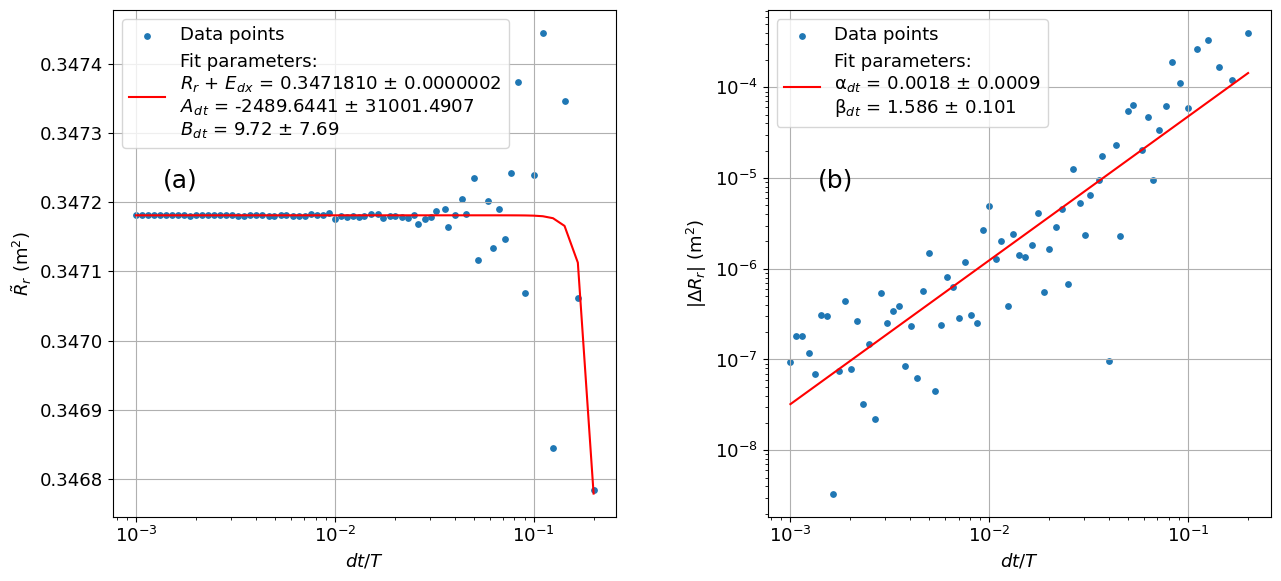

In [20]:
# Read the data from the file
df = pd.read_csv('../data/Run/ErrT.dat', sep=' ', header=None, names=['nstep', 'num'], index_col=False)

# Transform the data
df['dt'] = 1/(df['nstep'])
df = df[df['dt']<=0.2]

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dt'], df['num'], sigma=df['dt'])



# Generate fitted values
fitted_error = power_law(df['dt'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))  # Adjust the figsize to fit your needs

# Plotting the data on the first subplot
ax1.scatter(df['dt'], df['num'], label='Data points', s=15)
ax1.set_xlabel(r'$dt/T$')
ax1.set_ylabel(r'$\tilde{R}_r$ (m$^2$)')
# Plot the fitted curve on the first subplot
ax1.plot(df['dt'], fitted_error, color='red', label="Fit parameters: \n$R_r$ + $E_d$$_x$ = {:.7f} ± {:.7f}\n$A_d$$_t$ = {:.4f} ± {:.4f}\n$B_d$$_t$ = {:.2f} ± {:.2f}".format(params[0], standard_errors[0], params[1], standard_errors[1], params[2], standard_errors[2]))
ax1.set_xscale('log')
ax1.grid(True)
ax1.legend()
ax1.text(0.1, 0.65, "(a)", transform=ax1.transAxes, fontsize=18)

# Transform the data for the second plot
df['error'] = np.abs(df['num'] - params[0])
df['log_dt'] = np.log(df['dt'])
df['log_error'] = np.log(df['error'])


# Fit the data to the log-power-law model
params, covariance = curve_fit(log_power_law, df['log_dt'], df['log_error'])
# Calculate the standard errors again, assuming it's required for the second fit
standard_errors = np.sqrt(np.diag(covariance))
# Generate fitted values for the second plot
fitted_error = np.exp(log_power_law(df['log_dt'], *params))

# Plotting the data on the second subplot
ax2.scatter(df['dt'], df['error'], label='Data points', s=15)
ax2.set_xlabel(r'$dt/T$')
ax2.set_ylabel(r'$|\Delta R_r|$ (m$^2$)')
# Plot the fitted curve on the second subplot
ax2.plot(df['dt'], fitted_error, color='red', label="Fit parameters: \nα$_d$$_t$ = {:.4f} ± {:.4f}\nβ$_d$$_t$ = {:.3f} ± {:.3f}".format(params[0], standard_errors[0], params[1], standard_errors[1]))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True)
ax2.legend()
ax2.text(0.1, 0.65, "(b)", transform=ax2.transAxes, fontsize=18)

# Adjust the layout so everything fits without overlapping
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between the subplots

# Save the figure to a file
plt.savefig('../Tesi/run_fit_dt.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/tmp/ipykernel_3320/1414676655.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


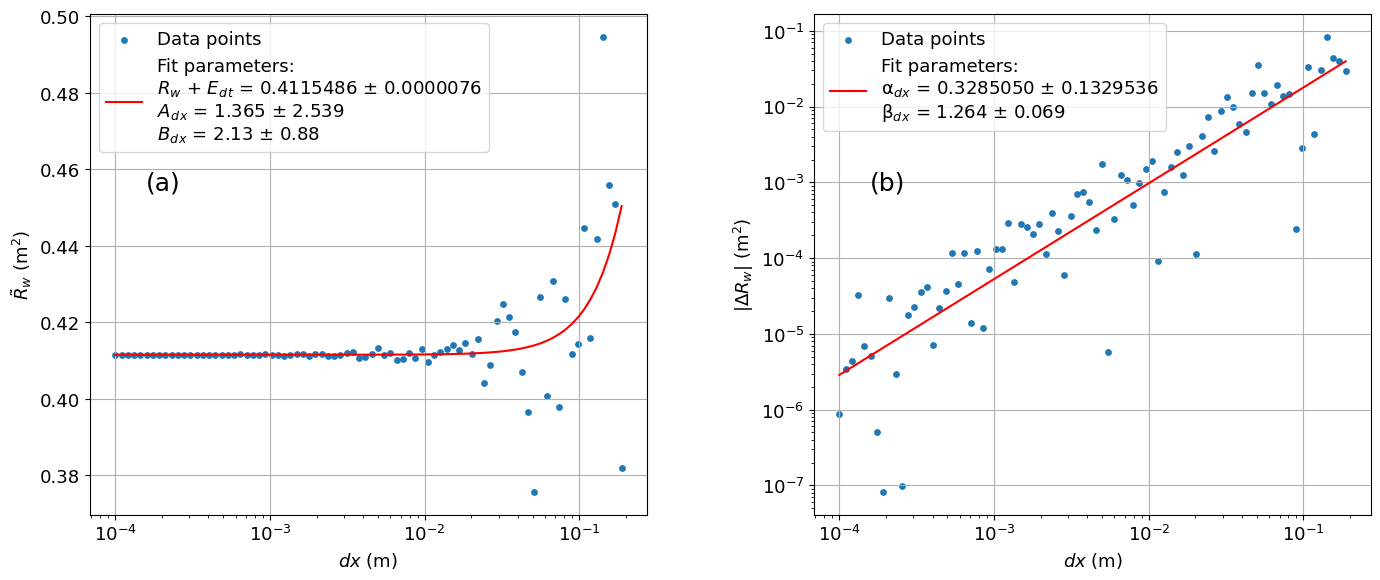

In [21]:
# Read the data from the file
df = pd.read_csv('../data/Walk/ErrDx.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)
df = df[df['dx']<=0.2]

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dx'], df['num'], sigma=df['dx'])

# Generate fitted values
fitted_error = power_law(df['dx'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# Adjust the font size for readability
plt.rcParams.update({'font.size': 13})

# Create a figure with two subplots (side by side) with more space
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the data on the first subplot
ax1.scatter(df['dx'], df['num'], label='Data points', s=15)
ax1.set_xlabel(r'$dx$ (m)')
ax1.set_ylabel(r'$\tilde{R}_w$ (m$^2$)')
# Plot the fitted curve on the first subplot
ax1.plot(df['dx'], fitted_error, color='red', label="Fit parameters: \n$R_w$ + $E_d$$_t$ = {:.7f} ± {:.7f}\n$A_d$$_x$ = {:.3f} ± {:.3f}\n$B_d$$_x$ = {:.2f} ± {:.2f}".format(params[0], standard_errors[0], params[1], standard_errors[1], params[2], standard_errors[2]))
ax1.set_xscale('log')
ax1.grid(True)
ax1.legend()
ax1.text(0.1, 0.65, "(a)", transform=ax1.transAxes, fontsize=18)

# Transform the data for the second plot
df['error'] = np.abs(df['num'] - params[0])
df['log_dx'] = np.log(df['dx'])
df['log_error'] = np.log(df['error'])

# Fit the data to the log-power-law model for the second plot
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])
# Calculate the standard errors again, assuming it's required for the second fit
standard_errors = np.sqrt(np.diag(covariance))
# Generate fitted values for the second plot
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data on the second subplot
ax2.scatter(df['dx'], df['error'], label='Data points', s=15)
ax2.set_xlabel(r'$dx$ (m)')
ax2.set_ylabel(r'$|\Delta R_w|$ (m$^2$)')
# Plot the fitted curve on the second subplot
ax2.plot(df['dx'], fitted_error, color='red', label="Fit parameters: \nα$_d$$_x$ = {:.7f} ± {:.7f}\nβ$_d$$_x$ = {:.3f} ± {:.3f}".format(params[0], standard_errors[0], params[1], standard_errors[1]))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True)
ax2.legend()
ax2.text(0.1, 0.65, "(b)", transform=ax2.transAxes, fontsize=18)


# Adjust the layout and spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between the subplots

# Save the figure to a file
plt.savefig('../Tesi/walk_fit_dx.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_3320/1414676655.py:26: RuntimeWarning: invalid value encountered in log
  return np.log(a) +  b*x


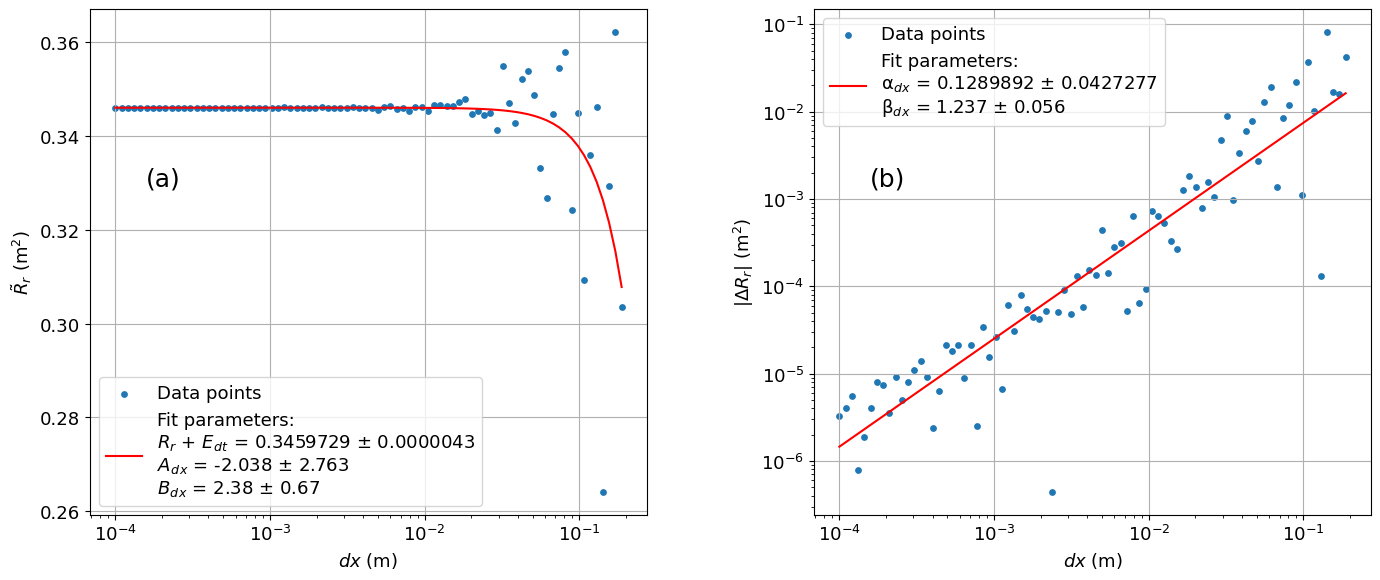

In [22]:
# Read the data from the file
df = pd.read_csv('../data/Run/ErrDx.dat', sep=' ', header=None, names=['dx', 'num'], index_col=False)
df = df[df['dx']<=0.2]

# Fit the data to the power-law model
params, covariance = curve_fit(power_law, df['dx'], df['num'], sigma=df['dx'])

# Generate fitted values
fitted_error = power_law(df['dx'], *params)

# Calculate the standard errors: the square root of the diagonal elements
standard_errors = np.sqrt(np.diag(covariance))

# Adjust the font size for readability
plt.rcParams.update({'font.size': 13})

# Create a figure with two subplots (side by side) with more space
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the data on the first subplot
ax1.scatter(df['dx'], df['num'], label='Data points', s=15)
ax1.set_xlabel(r'$dx$ (m)')
ax1.set_ylabel(r'$\tilde{R}_r$ (m$^2$)')
# Plot the fitted curve on the first subplot
ax1.plot(df['dx'], fitted_error, color='red', label="Fit parameters: \n$R_r$ + $E_d$$_t$ = {:.7f} ± {:.7f}\n$A_d$$_x$ = {:.3f} ± {:.3f}\n$B_d$$_x$ = {:.2f} ± {:.2f}".format(params[0], standard_errors[0], params[1], standard_errors[1], params[2], standard_errors[2]))
ax1.set_xscale('log')
ax1.grid(True)
ax1.legend()
ax1.text(0.1, 0.65, "(a)", transform=ax1.transAxes, fontsize=18)

# Transform the data for the second plot
df['error'] = np.abs(df['num'] - params[0])
df['log_dx'] = np.log(df['dx'])
df['log_error'] = np.log(df['error'])

# Fit the data to the log-power-law model for the second plot
params, covariance = curve_fit(log_power_law, df['log_dx'], df['log_error'])
# Calculate the standard errors again, assuming it's required for the second fit
standard_errors = np.sqrt(np.diag(covariance))
# Generate fitted values for the second plot
fitted_error = np.exp(log_power_law(df['log_dx'], *params))

# Plotting the data on the second subplot
ax2.scatter(df['dx'], df['error'], label='Data points', s=15)
ax2.set_xlabel(r'$dx$ (m)')
ax2.set_ylabel(r'$|\Delta R_r|$ (m$^2$)')
# Plot the fitted curve on the second subplot
ax2.plot(df['dx'], fitted_error, color='red', label="Fit parameters: \nα$_d$$_x$ = {:.7f} ± {:.7f}\nβ$_d$$_x$ = {:.3f} ± {:.3f}".format(params[0], standard_errors[0], params[1], standard_errors[1]))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True)
ax2.legend()
ax2.text(0.1, 0.65, "(b)", transform=ax2.transAxes, fontsize=18)


# Adjust the layout and spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the width space between the subplots

# Save the figure to a file
plt.savefig('../Tesi/run_fit_dx.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Optimal velocity

In [23]:
# Define human parallelepiped
Hsides = [0.14, 0.42, 1.68 ]

def VoptS( v_tail, v_cross ):
    if( v_tail > 0 ): return ( v_tail**2 + v_cross**2 + 1 )/v_tail
    else: return -1

def VoptP( v_tail, v_cross, sides ):
    if( v_tail > (sides[0]*sides[2]*abs(v_cross) + sides[0]*sides[1])/(sides[1]*sides[2]) ): return v_tail
    else: return -1

def VoptEll( v_tail, v_cross, a, b, c ):
    if( v_tail > 0 ): return ( (a*b)**2 + (b*c*v_tail)**2 + (a*c*v_cross)**2 )/(v_tail*(b*c)**2)
    else: return -1

In [24]:
def Parable( x, vopt, k, R0 ):
    return k*(x - vopt)**2 + R0

In [25]:
# For OptMapFit
def Read_and_Fit( datapath, vmax=100 ):
    data = pd.read_csv(datapath, sep=' ', header=None, names=['vtail', 'vcross', 'vb', 'wetness'], index_col=False)

    # Initialize a list to store the results
    results = []

    for vtail in data['vtail'].unique():
        for vcross in data['vcross'].unique():
            # Subset the data for the current vtail
            subset = data[(data['vtail'] == vtail) & (data['vcross'] == vcross)]
        
            # Use curve_fit to fit the Parable function
            try:
                popt, pcov = curve_fit(Parable, subset['vb'], subset['wetness'], p0=[0.2, 2, 1.0])
                # Extract vopt, k, and R0 from the optimized parameters
                vopt, k, R0 = popt
            
                # Calculate the standard deviation errors from the covariance matrix
                perr = np.sqrt(np.diag(pcov))

                # Check validity of fit
                if( k < 0 or vopt > vmax or vopt < 0 ):
                    # continue
                    vopt = subset.loc[subset['wetness'].idxmin(), 'vb']
                    R0 = subset['wetness'].min()
                    perr[0] = 0
                    perr[2] = 0
            
                # Store the results
                results.append({'vtail': vtail, 'vcross': vcross, 'vopt': vopt, 'vopt_error': perr[0], 'Rb': R0, 'Rb_error': perr[2]})
            except:
                # continue
                vopt = subset.loc[subset['wetness'].idxmin(), 'vb']
                R0 = subset['wetness'].min()
                results.append({'vtail': vtail, 'vcross': vcross, 'vopt': vopt, 'vopt_error': 0, 'Rb': R0, 'Rb_error': 0})
                continue
    

    # Convert the results into a DataFrame and filter out problematic rows
    results_df = pd.DataFrame(results).replace([np.inf, -np.inf], np.nan).dropna()

    return results_df


    
    

In [26]:
# To compare two bodies
def Compare( df1, df2 ):
    if(df1.shape != df2.shape):
        print('Dataframes have different sizes!')
    # Initialize a list to store the results
    results = []

    for vtail in df1['vtail'].unique():
        for vcross in df1['vcross'].unique():
            row1 = df1.loc[(df1['vcross'] == vcross) & (df1['vtail'] == vtail)].iloc[0]
            row2 = df2.loc[(df2['vcross'] == vcross) & (df2['vtail'] == vtail)].iloc[0]
            if( row1['Rb'] < row2['Rb'] ):
                results.append({'vtail': vtail, 'vcross': vcross, 'vopt': row1['vopt'], 'Rb': row1['Rb'], 'Rdiff': (row2['Rb'] - row1['Rb'])/row1['Rb'], 'type': 1})
            else:
                results.append({'vtail': vtail, 'vcross': vcross, 'vopt': row2['vopt'], 'Rb': row2['Rb'], 'Rdiff': (row1['Rb'] - row2['Rb'])/row2['Rb'], 'type': 2})
    
    # Convert the results into a DataFrame and filter out problematic rows
    results_df = pd.DataFrame(results).replace([np.inf, -np.inf], np.nan).dropna()

    return results_df    


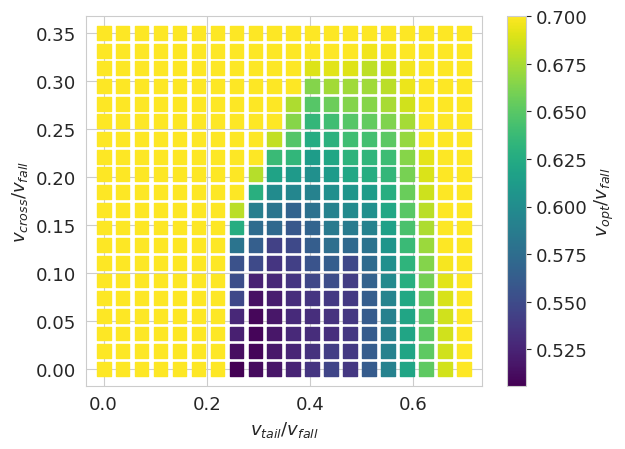

In [31]:
opt_map_walk = Read_and_Fit( '../data/Walk/OptMapFitW.dat', 0.7 )


plt.scatter(opt_map_walk['vtail'], opt_map_walk['vcross'], c=opt_map_walk['vopt'], cmap='viridis', vmax=0.7, s=100, marker='s', label='Walk')

plt.colorbar(label=r'$v_{opt}/v_{fall}$')
plt.xlabel(r'$v_{tail}/v_{fall}$')
plt.ylabel(r'$v_{cross}/v_{fall}$')

plt.savefig('../Tesi/walk_vopt_field.png', dpi=300, bbox_inches='tight')

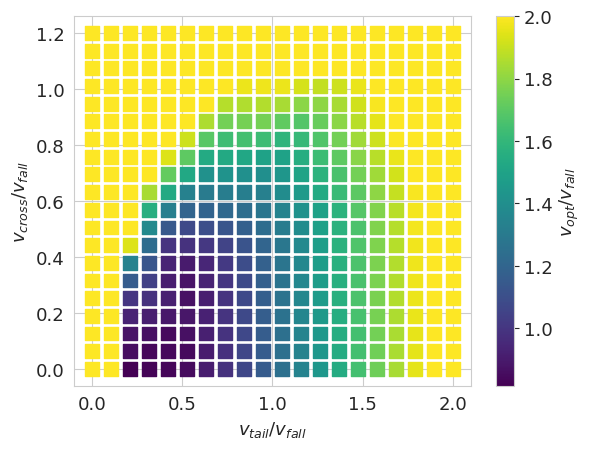

In [32]:
opt_map_run = Read_and_Fit( '../data/Run/OptMapFitR.dat', 2 )

plt.scatter(opt_map_run['vtail'], opt_map_run['vcross'], c=opt_map_run['vopt'], cmap='viridis', vmax=2, s=100, marker='s', label='Run')

plt.colorbar(label=r'$v_{opt}/v_{fall}$')
plt.xlabel(r'$v_{tail}/v_{fall}$')
plt.ylabel(r'$v_{cross}/v_{fall}$')

plt.savefig('../Tesi/run_vopt_field.png', dpi=300, bbox_inches='tight')

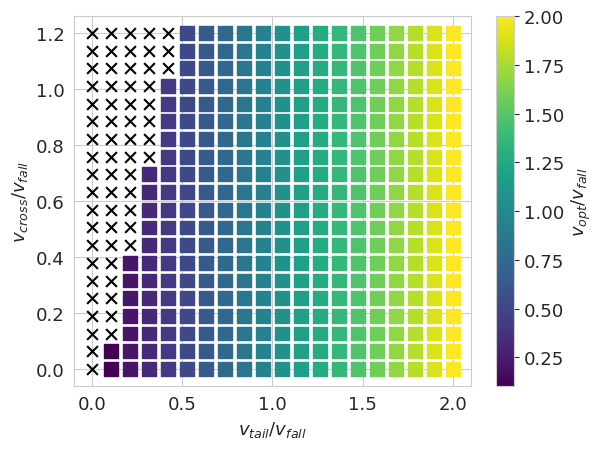

In [33]:
# Analyutical graph for sphere
opt_map_run['voptHP'] = opt_map_run.apply(lambda row: VoptP(row['vtail'], row['vcross'], Hsides), axis=1)

# Separate data into two subsets
data_positive_voptS = opt_map_run[opt_map_run['voptHP'] >= 0]
data_negative_voptS = opt_map_run[opt_map_run['voptHP'] < 0]

# Plot the Data for negative voptHP with a different shape
plt.scatter(data_negative_voptS['vtail'], data_negative_voptS['vcross'], color='black', s=60, marker='x', label='voptHP < 0')

# Plot the Data using a Scatter Plot with a Colormap for positive voptHP
plt.scatter(data_positive_voptS['vtail'], data_positive_voptS['vcross'], c=data_positive_voptS['voptHP'], cmap='viridis', s=100, marker='s', label='voptHP >= 0')



plt.colorbar(label=r'$v_{opt}/v_{fall}$')
plt.xlabel(r'$v_{tail}/v_{fall}$')
plt.ylabel(r'$v_{cross}/v_{fall}$')
# plt.legend()

# Save the figure to a file
plt.savefig('../Tesi/pippo_vopt_field.png', dpi=300, bbox_inches='tight')

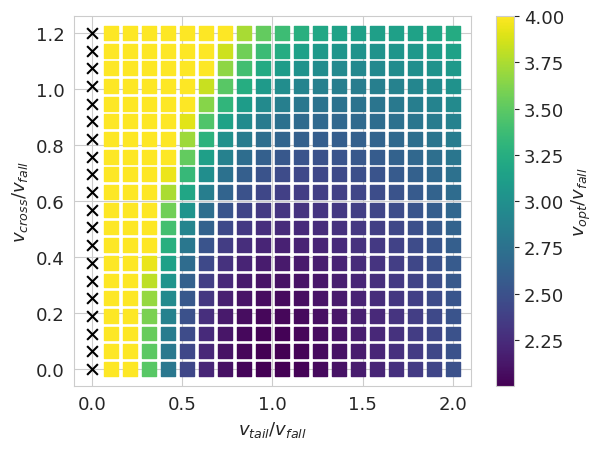

In [34]:
# Analyutical graph for sphere
opt_map_run['voptS'] = opt_map_run.apply(lambda row: VoptS(row['vtail'], row['vcross']), axis=1)

# Separate data into two subsets
data_positive_voptS = opt_map_run[opt_map_run['voptS'] >= 0]
data_negative_voptS = opt_map_run[opt_map_run['voptS'] < 0]

# Plot the Data for negative voptS with a different shape
plt.scatter(data_negative_voptS['vtail'], data_negative_voptS['vcross'], color='black', s=60, marker='x', label='voptS < 0')

# Plot the Data using a Scatter Plot with a Colormap for positive voptS
plt.scatter(data_positive_voptS['vtail'], data_positive_voptS['vcross'], c=data_positive_voptS['voptS'], cmap='viridis', vmax=4, s=100, marker='s', label='voptS >= 0')



plt.colorbar(label=r'$v_{opt}/v_{fall}$')
plt.xlabel(r'$v_{tail}/v_{fall}$')
plt.ylabel(r'$v_{cross}/v_{fall}$')
# plt.legend()

# Save the figure to a file
plt.savefig('../Tesi/sphere_vopt_field.png', dpi=300, bbox_inches='tight')

In [35]:
# # Analyutical graph for ellipsoid
# opt_map_run['voptEll'] = opt_map_run.apply(lambda row: VoptEll(row['vtail'], row['vcross'], a=1, b=2, c=6), axis=1)

# # Separate data into two subsets
# data_positive_voptEll = opt_map_run[opt_map_run['voptEll'] >= 0]
# data_negative_voptEll = opt_map_run[opt_map_run['voptEll'] < 0]

# # Plot the Data for negative voptEll with a different shape
# plt.scatter(data_negative_voptEll['vtail'], data_negative_voptEll['vcross'], color='black', s=20, marker='x', label='voptEll < 0')

# # Plot the Data using a Scatter Plot with a Colormap for positive voptEll
# plt.scatter(data_positive_voptEll['vtail'], data_positive_voptEll['vcross'], c=data_positive_voptEll['voptEll'], cmap='viridis', vmax=2, s=40, marker='s', label='voptEll >= 0')



# plt.colorbar(label=r'$v_{opt}/v_{fall}$')
# plt.xlabel(r'$v_{tail}/v_{fall}$')
# plt.ylabel(r'$v_{cross}/v_{fall}$')

# Save the figure to a file
# plt.savefig('../Tesi/ellipsoid_vopt_field.png', dpi=300, bbox_inches='tight')

In [36]:
opt_comp_walk = Read_and_Fit( '../data/Walk/OptMapCompareW.dat', 0.7 )
# plt.scatter(opt_comp_walk['vtail'], opt_comp_walk['vcross'], c=opt_comp_walk['vopt'], cmap='viridis', vmax=0.7, s=100, marker='s', label='Run')

# plt.colorbar(label=r'$v_{opt}/v_{fall}$')
# plt.xlabel(r'$v_{tail}/v_{fall}$')
# plt.ylabel(r'$v_{cross}/v_{fall}$')
# plt.legend(framealpha=1.0, loc='upper left')

In [37]:
opt_comp_run = Read_and_Fit( '../data/Run/OptMapCompareR.dat', 2 )
# plt.scatter(opt_comp_run['vtail'], opt_comp_run['vcross'], c=opt_comp_run['vopt'], cmap='viridis', vmax=2, s=100, marker='s', label='Run')

# plt.colorbar(label=r'$v_{opt}/v_{fall}$')
# plt.xlabel(r'$v_{tail}/v_{fall}$')
# plt.ylabel(r'$v_{cross}/v_{fall}$')
# plt.legend(framealpha=1.0, loc='upper left')

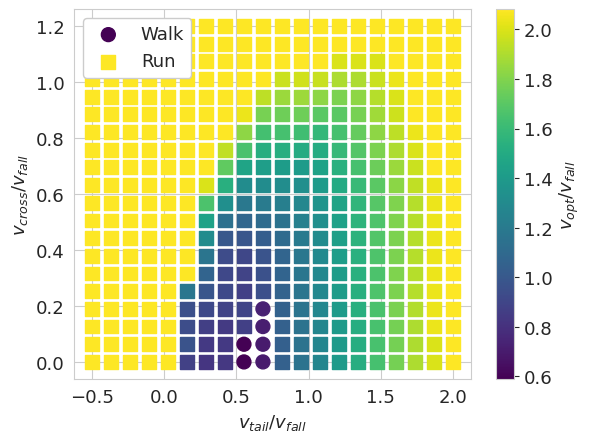

In [38]:
opt_comp = Compare(opt_comp_walk, opt_comp_run)

# Separate opt_comp into two subsets
opt_comp1 = opt_comp[opt_comp['type'] == 1]
opt_comp2 = opt_comp[opt_comp['type'] == 2]

# Plot the Data divided by type
plt.scatter(opt_comp1['vtail'], opt_comp1['vcross'], c=opt_comp1['vopt'], cmap='viridis', vmin=opt_comp['vopt'].min(), vmax=opt_comp['vopt'].max(), s=100, marker='o', label='Walk')
plt.scatter(opt_comp2['vtail'], opt_comp2['vcross'], c=opt_comp2['vopt'], cmap='viridis', vmin=opt_comp['vopt'].min(), vmax=opt_comp['vopt'].max(), s=100, marker='s', label='Run')



plt.colorbar(label=r'$v_{opt}/v_{fall}$')
plt.xlabel(r'$v_{tail}/v_{fall}$')
plt.ylabel(r'$v_{cross}/v_{fall}$')
plt.legend(framealpha=1.0, loc='upper left')

# Save the figure to a file
plt.savefig('../Tesi/compare_vopt_field.png', dpi=300, bbox_inches='tight')

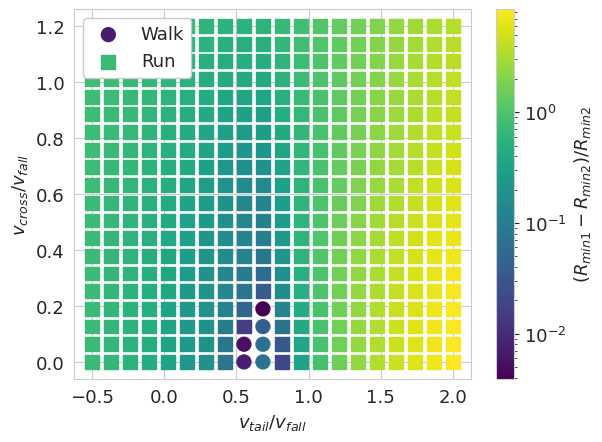

In [39]:
opt_comp = Compare(opt_comp_walk, opt_comp_run)

# Separate opt_comp into two subsets
opt_comp1 = opt_comp[opt_comp['type'] == 1]
opt_comp2 = opt_comp[opt_comp['type'] == 2]

# Plot the Data divided by type
plt.scatter(opt_comp1['vtail'], opt_comp1['vcross'], norm=colors.LogNorm(vmin=opt_comp['Rdiff'].min(), vmax=opt_comp['Rdiff'].max()), c=opt_comp1['Rdiff'], cmap='viridis', s=100, marker='o', label='Walk')
plt.scatter(opt_comp2['vtail'], opt_comp2['vcross'], norm=colors.LogNorm(vmin=opt_comp['Rdiff'].min(), vmax=opt_comp['Rdiff'].max()), c=opt_comp2['Rdiff'], cmap='viridis',  s=100, marker='s', label='Run')



plt.colorbar(label=r'$(R_{min1}-R_{min2})/R_{min2}$')
plt.xlabel(r'$v_{tail}/v_{fall}$')
plt.ylabel(r'$v_{cross}/v_{fall}$')
plt.legend(framealpha=1.0, loc='upper left')

### Optimal curve

In [27]:
def process_and_plot(datapath, label, color, marker, maxvb, Nfit = 5):
    """
    Process the given data, fit the Parable function, and plot the results.
    
    Parameters:
    - data: DataFrame with the data to be processed.
    - label: Label for the plot legend to differentiate the data source.
    - color: Color of the plot points and error bars.
    - marker: Marker style for the plot points.
    """

    data = pd.read_csv(datapath, sep=' ', header=None, names=['vtail', 'vb', 'wetness'], index_col=False)



    # Initialize a list to store the results
    results = []

    # Iterate over each unique value of vtail in the dataset
    for vtail in data['vtail'].unique():
        # Subset the data for the current vtail
        subset = data[data['vtail'] == vtail]

        # keep number of fit points to Nfit


        num_rows = subset.shape[0]
        # Check if the subsetFrame has more than 5 rows
        if num_rows > Nfit:
            # Calculate the starting index of the Nfit central rows
            start_index = (num_rows - Nfit) // 2
            # Keep only the Nfit central rows
            subset = subset.iloc[start_index:start_index + Nfit]
        
        # Use curve_fit to fit the Parable function
        try:
            popt, pcov = curve_fit(Parable, subset['vb'], subset['wetness'], p0=[0.2, 2, 1.0])
            # Extract vopt, k, and R0 from the optimized parameters
            vopt, k, R0 = popt
            
            # Calculate the standard deviation errors from the covariance matrix
            perr = np.sqrt(np.diag(pcov))

            # skips if fitting fails
            if( k < 0  or perr[0] > vopt  or perr[0] > 0.02):
                continue
            
            # Store the results
            results.append({'vtail': vtail, 'vopt': vopt, 'vopt_error': perr[0]})
        except:
            # Skip if fitting fails
            continue

    # Convert the results into a DataFrame and filter out problematic rows
    results_df = pd.DataFrame(results).replace([np.inf, -np.inf], np.nan).dropna()
    results_df = results_df[ results_df["vopt"] <= maxvb ]

    # Plotting
    plt.errorbar(results_df['vtail'], results_df['vopt'], yerr=results_df['vopt_error'], fmt=marker, ecolor=color, capsize=5, color=color, linestyle='None', label=label)

# Example function to plot fit for specific vtail and vcross values
def plot_fit_for_vtail(datapath, vtail_value, vcross_value=-1., x_param='vb', y_param='wetness', Nfit = 5):
    data = pd.read_csv(datapath, sep=' ', header=None, names=['vtail', 'vb', 'wetness'], index_col=False)

    # Step 1: Filter the data
    filtered_data = data[(data['vtail'] == vtail_value)]
    if(vcross_value != -1. ):
        filtered_data = data[(data['cross'] == vtail_value)]
    
    # Ensure there is enough data to fit
    if filtered_data.empty or len(filtered_data) < 3:  # Adjust the condition based on your model requirements
        print("Not enough data for fitting.")
        return
    
    # keep number of fit points to Nfit
    num_rows = filtered_data.shape[0]
    # Check if the filtered_dataFrame has more than Nfit rows
    if num_rows > Nfit:
        # Calculate the starting index of the Nfit central rows
        start_index = (num_rows - Nfit) // 2
        # Keep only the Nfit central rows
        filtered_data = filtered_data.iloc[start_index:start_index + 5]
    
    # Step 2: Fit the model
    # Assuming 'x_param' and 'y_param' are column names for your x and y data respectively
    popt, _ = curve_fit(Parable, filtered_data[x_param], filtered_data[y_param], p0=[0.2, 2, 1.0])
    
    # Step 3: Plot the data and fit
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_data[x_param], filtered_data[y_param], label='Actual Data')
    
    # Generate x values for the fit curve
    x_fit = np.linspace(filtered_data[x_param].min(), filtered_data[x_param].max(), 100)
    y_fit = Parable(x_fit, *popt)
    plt.plot(x_fit, y_fit, color='red', label='Fitted Model')
    
    plt.xlabel(x_param)
    plt.ylabel(y_param)
    plt.title(f'Fit for vtail={vtail_value}')
    plt.legend()
    plt.show()

In [41]:
# # Simulat# Prepare the plot
# plt.figure(figsize=(12, 8))

# # For demonstration, using the same data but will differentiate in the plot
# process_and_plot('../data/Walk/OptFit0NN.dat', r'$v_{cross} = 0$ $v_{fall}$', 'red', 'o', maxvb=0.7)  
# process_and_plot('../data/Walk/OptFit015NN.dat', r'$v_{cross} = 0.15$  $v_{fall}$', 'green', 's', maxvb=0.7)
# process_and_plot('../data/Walk/OptFit025NN.dat', r'$v_{cross} = 0.25$  $v_{fall}$', 'blue', 'v', maxvb=0.7)
# process_and_plot('../data/Walk/OptFit030NN.dat', r'$v_{cross} = 0.30$  $v_{fall}$', 'darkorange', 'v', maxvb=0.7)


# plt.xlabel(r'$v_{tail}/v_{fall}$')
# plt.ylabel(r'$v_{opt}/v_{fall}$')
# plt.grid(True)
# plt.legend(loc='lower right')


# Save the figure to a file
# plt.savefig('../Tesi/walk_vopt_graph.png', dpi=300, bbox_inches='tight')

In [42]:
# # Simulat# Prepare the plot
# plt.figure(figsize=(12, 8))

# # For demonstration, using the same data but will differentiate in the plot
# process_and_plot('../data/Walk/OptFit0NN.dat', r'$v_{cross} = 0$ $v_{fall}$', 'red', 'o', maxvb=0.7)  
# process_and_plot('../data/Walk/OptFit015NN.dat', r'$v_{cross} = 0.15$  $v_{fall}$', 'green', 's', maxvb=0.7)
# process_and_plot('../data/Walk/OptFit025NN.dat', r'$v_{cross} = 0.25$  $v_{fall}$', 'blue', 'v', maxvb=0.7)
# process_and_plot('../data/Walk/OptFit030NN.dat', r'$v_{cross} = 0.30$  $v_{fall}$', 'darkorange', 'v', maxvb=0.7)


# plt.xlabel(r'$v_{tail}/v_{fall}$')
# plt.ylabel(r'$v_{opt}/v_{fall}$')
# plt.grid(True)
# plt.legend(loc='lower right')


# Save the figure to a file
# plt.savefig('../Tesi/walk_vopt_graph.png', dpi=300, bbox_inches='tight')

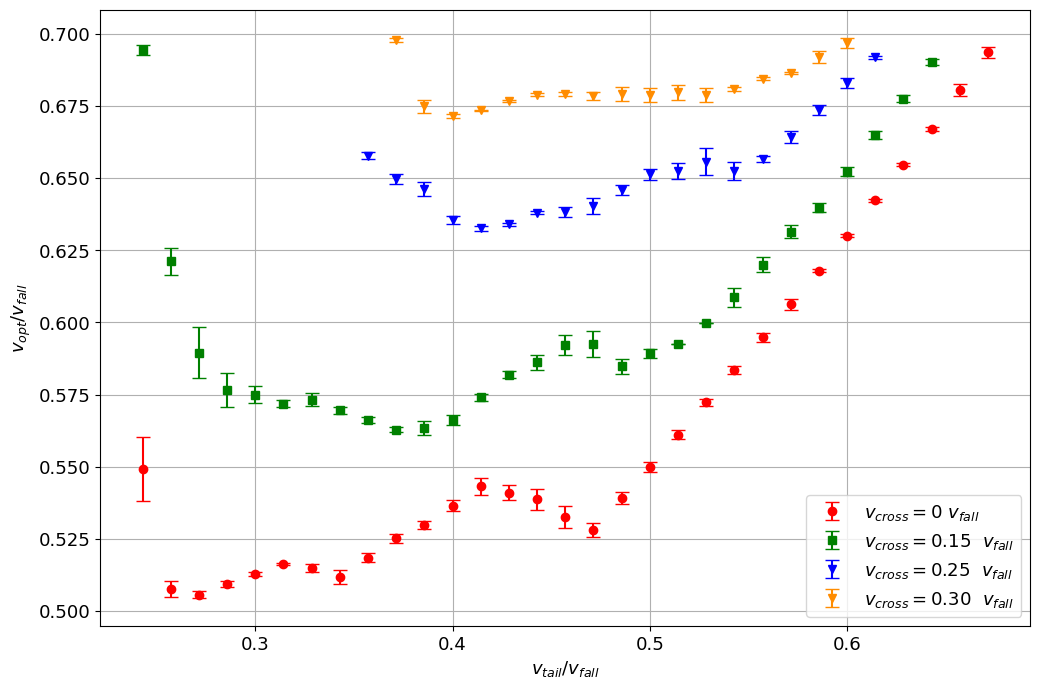

In [28]:
# Simulat# Prepare the plot
plt.figure(figsize=(12, 8))

# For demonstration, using the same data but will differentiate in the plot
process_and_plot('../data/Walk/OptFitW0.dat', r'$v_{cross} = 0$ $v_{fall}$', 'red', 'o', maxvb=0.7)  
process_and_plot('../data/Walk/OptFitW015.dat', r'$v_{cross} = 0.15$  $v_{fall}$', 'green', 's', maxvb=0.7)
process_and_plot('../data/Walk/OptFitW025.dat', r'$v_{cross} = 0.25$  $v_{fall}$', 'blue', 'v', maxvb=0.7)
process_and_plot('../data/Walk/OptFitW030.dat', r'$v_{cross} = 0.30$  $v_{fall}$', 'darkorange', 'v', maxvb=0.7)

plt.xlabel(r'$v_{tail}/v_{fall}$')
plt.ylabel(r'$v_{opt}/v_{fall}$')
plt.grid(True)
plt.legend(loc='lower right')


# Save the figure to a file
# plt.savefig('../Tesi/walk_vopt_graph.png', dpi=300, bbox_inches='tight')

In [29]:
# plot_fit_for_vtail( '../data/Walk/OptFit025.dat', 0.342857142857, Nfit=7)
# plot_fit_for_vtail( '../data/Walk/OptFit025.dat', 0.342857142857)


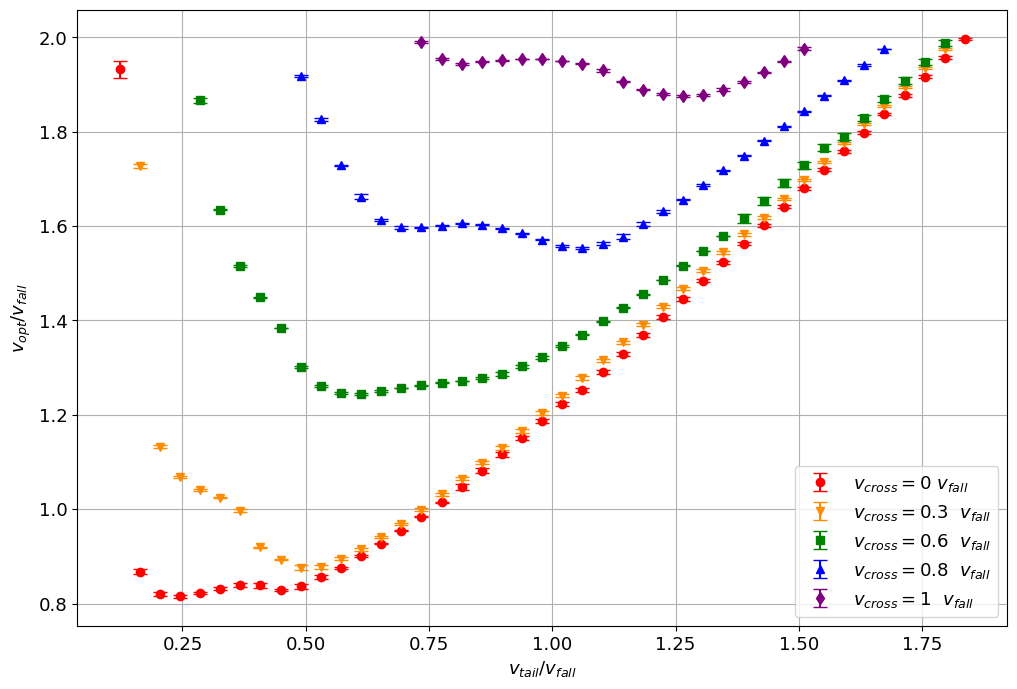

In [32]:
# Prepare the plot
plt.figure(figsize=(12, 8))

# For demonstration, using the same data but will differentiate in the plot
process_and_plot('../data/Run/OptFitR0.dat', r'$v_{cross} = 0$ $v_{fall}$', 'red', 'o', maxvb=2)  
process_and_plot('../data/Run/OptFitR03.dat', r'$v_{cross} = 0.3$  $v_{fall}$', 'darkorange', 'v', maxvb=2)
process_and_plot('../data/Run/OptFitR06.dat', r'$v_{cross} = 0.6$  $v_{fall}$', 'green', 's', maxvb=2)
process_and_plot('../data/Run/OptFitR08.dat', r'$v_{cross} = 0.8$  $v_{fall}$', 'blue', '^', maxvb=2)
process_and_plot('../data/Run/OptFitR1.dat', r'$v_{cross} = 1$  $v_{fall}$', 'purple', 'd', maxvb=2)

plt.xlabel(r'$v_{tail}/v_{fall}$')
plt.ylabel(r'$v_{opt}/v_{fall}$')
plt.grid(True)
plt.legend(loc='lower right')

# Save the figure to a file
plt.savefig('../Tesi/run_vopt_graph.png', dpi=300, bbox_inches='tight')

In [47]:
# plot_fit_for_vtail( '../data/Run/OptFit05N.dat', 0.734693877551)
# plot_fit_for_vtail( '../data/Run/OptFit05N.dat', 0.775510204082)

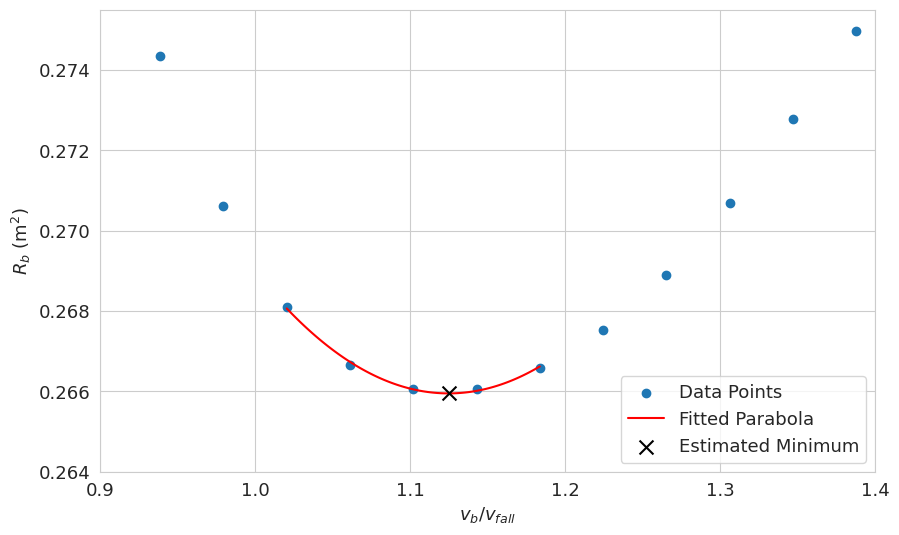

In [48]:
data = pd.read_csv('../data/Run/GraphFit.dat', sep=' ', header=None, names=['vb', 'Rb'], index_col=False)

# Finds values to fit
Nfit = 5
min_Rb_index = data['Rb'].idxmin()
start_index = int(max(0, min_Rb_index - Nfit//2))  # Evita indici negativi
end_index = int(min(len(data), start_index + Nfit))  # Evita indici oltre la lunghezza del data

data_fit = data.iloc[start_index:end_index]


popt, _ = curve_fit(Parable, data_fit['vb'], data_fit['Rb'], p0=[0.2, 2, 1.0])
# Extract vopt, k, and R0 from the optimized parameters
vopt, k, R0 = popt
    
# Plot the data and fit
plt.figure(figsize=(10, 6))
plt.scatter(data['vb'], data['Rb'], label='Data Points')
    
# Generate x values for the fit curve
x_fit = np.linspace(data_fit['vb'].min(), data_fit['vb'].max(), 100)
y_fit = Parable(x_fit, *popt)
plt.plot(x_fit, y_fit, color='red', label='Fitted Parabola')
# plt.scatter(data_fit['vb'], data_fit['Rb'], label='Data Points')
plt.scatter(x = vopt, y = R0, label = r'Estimated Minimum', color='black', s=100, marker='x', zorder=4 )

plt.ylim([0.264, 0.2755])
plt.xlim([0.9, 1.4])
plt.legend( loc='lower right')

plt.xlabel(r'$v_{b}/v_{fall}$')
plt.ylabel(r'$R_b$ (m$^2$)')

#  Save the figure to a file
plt.savefig('../Tesi/min_fit_graph.png', dpi=300, bbox_inches='tight')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

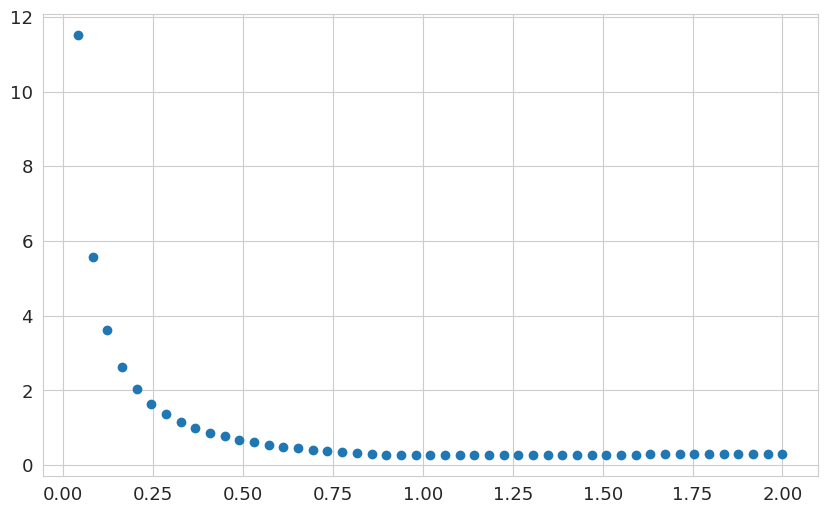

In [49]:
data = pd.read_csv('../data/Run/GraphFit.dat', sep=' ', header=None, names=['vb', 'RbR'], index_col=False)

vb = np.linspace(0.001, 2, 500)
vrain = [ 0.75, 0.5, -1]
r = 0.36
sides = [np.array([0.14, 0.0, 0.0]), np.array([0.0, 0.42, 0.0]), np.array([0.0, 0.0, 1.68])]



plt.figure(figsize=(10, 6))
plt.scatter(data['vb'], data['RbR'], label='Corsa')
plt.plot(vb, anal_s(vrain, vb, r), label='Sfera', color='red', linestyle='dashed', alpha=0.7)
plt.plot(vb, anal_p(vrain, vb, sides), label='Parallelepipedo', color='green', linestyle='dashdot', alpha=0.7)

plt.annotate('Velocità ottimale',
ha = 'center', va = 'bottom',
xytext = (vopt, R0+0.05),
xy = (vopt, R0),
arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })

plt.ylim([0.22, 0.55])
plt.xlim([0.6, 2.02])
plt.xlabel(r'$v_{b}/v_{fall}$')
plt.ylabel(r'$R_b$ (m$^2$)')
plt.legend(loc='upper right', framealpha = 1)

#  Save the figure to a file
plt.savefig('../Tesi/wet_comp.png', dpi=300, bbox_inches='tight')

## Printing Shadows

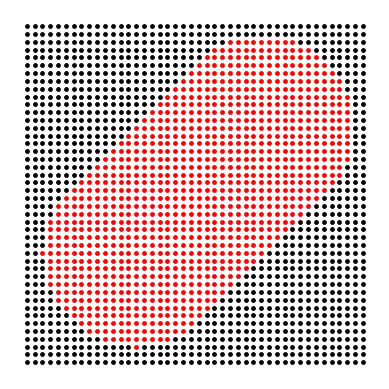

In [ ]:
rayO = pd.read_csv('../data/Capsule/OneCapProj.dat', sep=',', header=None, names=['x', 'y', 'on'], index_col=False)
rayO_on = rayO[ rayO['on']==1]
rayO_off = rayO[ rayO['on']==0]
plt.scatter(rayO_on['x'], rayO_on['y'], s=6, color='black')
plt.scatter(rayO_off['x'], rayO_off['y'], s=6, color='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)
plt.axis('off')
plt.savefig('../Tesi/OneCapProj.png',bbox_inches='tight',pad_inches = 0, dpi = 300)

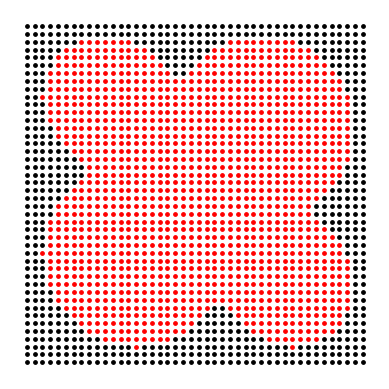

In [ ]:
rayO = pd.read_csv('../data/Capsule/TwoCapProj.dat', sep=',', header=None, names=['x', 'y', 'on'], index_col=False)
rayO_on = rayO[ rayO['on']==1]
rayO_off = rayO[ rayO['on']==0]
plt.scatter(rayO_on['x'], rayO_on['y'], s=6, color='black')
plt.scatter(rayO_off['x'], rayO_off['y'], s=6, color='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(False)
plt.axis('off')
plt.savefig('../Tesi/TwoCapProj.png',bbox_inches='tight',pad_inches = 0, dpi = 300)

In [ ]:
# # # Declare functions to print shadows
# def GraphShadow( infile ):
#     plt.figure()
#     DF = pd.read_csv(infile, sep=',', header=None, names=['x', 'y', 'on'], index_col=False)
#     DF = DF[ DF['on']==1]
#     plt.scatter(DF['x'], DF['y'], s=0.1, color='black')
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.axis('off')
#     plt.grid(False)
#     plt.show()

# def GraphShadowPrint( infile, outfile ):
#     plt.figure()
#     plt.axis('off')
#     plt.savefig(outfile,bbox_inches='tight',pad_inches = 0, dpi = 300)
#     plt.close()

#     DF = pd.read_csv(infile, sep=',', header=None, names=['x', 'y', 'on'], index_col=False)
#     DF = DF[ DF['on']==1]
#     plt.scatter(DF['x'], DF['y'], s=0.1, color='black')
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.grid(False)
#     plt.axis('off')
#     plt.savefig(outfile,bbox_inches='tight',pad_inches = 0, dpi = 300)
#     plt.close()


# GraphShadowPrint('../data/Walk/Proj/Walk_xy0.000000.dat', 'WalkFrames/Walk_xy0.000000.png')

In [ ]:
# Define the start, end, and step values
# start = 0.000000
# end = 1
# step = 0.01666666666

# # Iterate over the range and call GraphShadowPrint for each file
# i = 1
# while start < end:
#     print(start)
#     infile = f'../data/Walk/Proj/Walk_xy{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_xy-{i}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Walk/Proj/Walk_xz{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_xz-{i}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Walk/Proj/Walk_yz{start:.6f}.dat'
#     outfile = f'WalkFrames/Walk_yz-{i}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_xy{start:.6f}.dat'
#     outfile = f'RunFrames/Run_xy-{i}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_xz{start:.6f}.dat'
#     outfile = f'RunFrames/Run_xz-{i}.png'
#     GraphShadowPrint(infile, outfile)
#     infile = f'../data/Run/Proj/Run_yz{start:.6f}.dat'
#     outfile = f'RunFrames/Run_yz-{i}.png'
#     GraphShadowPrint(infile, outfile)
#     start += step
#     i += 1